Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

Filename identifiers 

1. Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
2. Vocal channel (01 = speech, 02 = song).
3. Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
4. Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
5. Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
6. Repetition (01 = 1st repetition, 02 = 2nd repetition).
7. Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [ ]:
emotion_dict = {'01' : 'neutral', 
                  '02' : 'calm', 
                  '03' : 'happy', 
                  '04' : 'sad', 
                  '05' : 'angry', 
                  '06' : 'fearful', 
                  '07' : 'disgust', 
                  '08' : 'surprised', 
                 }
                 
def get_label(filename):
  codes = filename.split('-')
  emotion_code = codes[2]
  emotion_label = emotion_dict[emotion_code]
  return emotion_label

print( get_label("03-02-03-02-02-02-02.wav") )
print( get_label("03-02-05-02-02-02-02.wav") )

happy
angry


In [ ]:
def add_noise(soundwave):
    amp = 0.005 * np.random.uniform() * np.amax(soundwave)
    soundwave = soundwave.astype('float64') + (amp * np.random.normal(size=soundwave.shape[0]))
    return soundwave

In [ ]:
import json
import os
import math
import librosa

data_path = "/content/drive/MyDrive/Colab Notebooks/Zenodo_1188976"
json_path = "/content/drive/MyDrive/Colab Notebooks/SpeechEmotionMFCC.json"

SAMPLE_RATE = 22050 #bit per second


def save_mfcc(data_path, json_path, num_coef=13, size_ftt=1024, size_hop=256):
  data = {
          "labels": [],
          "mfcc": []
         }
  
  for i, (dirpath, dirnames, filenames) in enumerate(os.walk(data_path)):
    if dirpath is not data_path:
      for filename in filenames:
        file_path = os.path.join(dirpath, filename)
        soundwave, sampleRate = librosa.load(file_path, sr=SAMPLE_RATE)

        soundwave = add_noise(soundwave)
        print(filename, soundwave.shape)

        label = get_label(filename)

        segmentDuration = 2.0 #second
        samplesPerSegment = math.floor(segmentDuration * SAMPLE_RATE)
        numOf_segments = math.ceil(soundwave.shape[0] / samplesPerSegment)
        print(samplesPerSegment, numOf_segments)

        for segmentCount in range(numOf_segments):
          start = segmentCount * samplesPerSegment
          stop = start + samplesPerSegment

          segment = soundwave[start:stop]
          segment = np.resize(segment, (samplesPerSegment))
          #print(filename, segment.shape)

          mfcc = librosa.feature.mfcc(segment, sr=sampleRate, n_fft=size_ftt, n_mfcc=num_coef, hop_length=size_hop)
          mfcc = mfcc.T
          print(mfcc.shape)

          data["labels"].append(label)
          data["mfcc"].append(mfcc.tolist())
  
  with open(json_path, "w") as fp:
    json.dump(data, fp, indent=4)

#save_mfcc(data_path, json_path) #It takes about 15 minutes

Streaming output truncated to the last 5000 lines.
(173, 13)
(173, 13)
03-01-01-01-01-01-17.wav (84610,)
44100 2
(173, 13)
(173, 13)
03-01-01-01-02-02-17.wav (76517,)
44100 2
(173, 13)
(173, 13)
03-01-02-01-01-02-17.wav (77989,)
44100 2
(173, 13)
(173, 13)
03-01-01-01-02-01-17.wav (77253,)
44100 2
(173, 13)
(173, 13)
03-01-02-01-01-01-17.wav (77253,)
44100 2
(173, 13)
(173, 13)
03-01-03-01-01-01-17.wav (76517,)
44100 2
(173, 13)
(173, 13)
03-01-04-01-01-02-17.wav (77253,)
44100 2
(173, 13)
(173, 13)
03-01-03-02-01-01-17.wav (82403,)
44100 2
(173, 13)
(173, 13)
03-01-02-02-02-02-17.wav (77989,)
44100 2
(173, 13)
(173, 13)
03-01-02-02-02-01-17.wav (84610,)
44100 2
(173, 13)
(173, 13)
03-01-04-01-01-01-17.wav (80931,)
44100 2
(173, 13)
(173, 13)
03-01-03-01-02-01-17.wav (76517,)
44100 2
(173, 13)
(173, 13)
03-01-02-02-01-02-17.wav (79460,)
44100 2
(173, 13)
(173, 13)
03-01-03-02-02-01-17.wav (82403,)
44100 2
(173, 13)
(173, 13)
03-01-03-01-01-02-17.wav (77989,)
44100 2
(173, 13)
(173, 13)

In [ ]:
import numpy as np

label_dict = {'neutral' : 0, 
              'calm' : 1, 
              'happy' : 2, 
              'sad' : 3, 
              'angry' : 4, 
              'fearful' : 5, 
              'disgust' : 6, 
              'surprised' : 7, 
              }

def load_data(json_path):

    with open(json_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    mfccs = np.array(data["mfcc"])
    labels = np.asarray(data["labels"])

    print("Data succesfully loaded!")

    x = np.zeros((mfccs.shape[0], 173, 13))
    y = np.zeros(labels.shape[0])
    for i in range(len(mfccs)):
      mfcc = np.array(mfccs[i])
      label = labels[i]
      x[i] = np.resize(mfcc, (173,13))
      y[i] = label_dict[label]

    return x, y

x, y = load_data(json_path)
print(x.shape)
print(y)

Data succesfully loaded!
(3135, 173, 13)
[0. 0. 0. ... 7. 7. 7.]


In [67]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
 
# Model 
model = keras.Sequential()

model.add(keras.layers.Conv1D(filters=256, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=(x.shape[1], x.shape[2])))

model.add(keras.layers.MaxPooling1D(pool_size=(5)))

model.add(keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu"))

model.add(keras.layers.LSTM(128, return_sequences=True))
model.add(keras.layers.LSTM(128))
 
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.1))
 
model.add(keras.layers.Dense(8, activation='softmax'))
 
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model.summary()
 
# train model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=30)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 173, 256)          16896     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 34, 256)           0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 34, 128)           98432     
_________________________________________________________________
lstm_56 (LSTM)               (None, 34, 128)           131584    
_________________________________________________________________
lstm_57 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_112 (Dense)            (None, 512)               66048     
_________________________________________________________________
dropout_84 (Dropout)         (None, 512)             

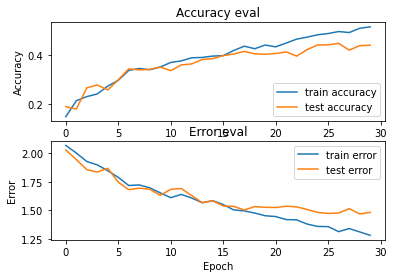

In [68]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[1].set_xlabel("Epoch")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

axs[1].plot(history.history["loss"], label="train error")
axs[1].plot(history.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

In [ ]:
import tensorflow as tf

predictions = model.predict(x_test)
print(predictions[0])

[0.03873065 0.03306264 0.02731846 0.03210729 0.52891105 0.12719695
 0.15703267 0.05564025]
